In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-used-cars-dataset/used_cars_data.csv


In [2]:
#Step1: Necessery imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import scipy as scipy
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import linear_model
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import absolute

In [3]:
#Step2: Loading the data 
#Change the csv file for another brand
#Added Data types for memory optimization and faster loading
data = pd.read_csv("/kaggle/input/us-used-cars-dataset/used_cars_data.csv", low_memory=False, nrows=100000,
                   dtype={
'vin': object,
'back_legroom': object ,
'bed': object ,
'bed_height': object ,
'body_type' : object ,
'cabin' : object,
'city' :object,
'city_fuel_economy' : float,
'combine_fuel_economy' : float,
'daysonmarket' : int ,
'dealer_zip' : int ,
'description' :object ,
'engine_cylinders' :object ,
'engine_displacement' : float,
'engine_type' : object ,
'exterior_color' : object ,
'fleet' :object ,
'frame_damaged' : object ,
'franchise_dealer' : 'bool',
'franchise_make' : object ,
'front_legroom' :object ,
'fuel_tank_volume' : object ,
'fuel_type' :object ,
'has_accidents' : object ,
'height' :object ,
'highway_fuel_economy' : float,
'horsepower' : float,
'interior_color' : object ,
'isCab' :object ,
'is_certified' : float,
'is_cpo' : object ,
'is_new' :'bool' ,
'is_oemcpo' :object ,
'latitude' : float,
'length' :object ,
'listed_date' :object ,
'listing_color' :object ,
'listing_id' : int ,
'longitude' : float,
'main_picture_url' :object ,
'major_options' :object ,
'make_name' : object ,
'maximum_seating' :object ,
'model_name' : object,
'owner_count' : float,
'power' : object ,
'price' : float,
'salvage' :object,
'savings_amount' : int ,
'seller_rating' : float,
'sp_id' : int,
'sp_name' : object ,
'theft_title' : object ,
'torque' :object ,
'transmission' : object ,
'transmission_display' : object ,
'trimId' :object ,
'trim_name' : object ,
'vehicle_damage_category' : float,
'wheel_system' : object,
'wheel_system_display' : object,
'wheelbase' : object,
'width' : object,
'year' : int 
         })

print(data.info()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 66 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   vin                      100000 non-null  object 
 1   back_legroom             95046 non-null   object 
 2   bed                      607 non-null     object 
 3   bed_height               8123 non-null    object 
 4   bed_length               8123 non-null    object 
 5   body_type                99599 non-null   object 
 6   cabin                    1667 non-null    object 
 7   city                     100000 non-null  object 
 8   city_fuel_economy        83984 non-null   float64
 9   combine_fuel_economy     0 non-null       float64
 10  daysonmarket             100000 non-null  int64  
 11  dealer_zip               100000 non-null  int64  
 12  description              97457 non-null   object 
 13  engine_cylinders         97002 non-null   object 
 14  engin

In [4]:
data.shape

(100000, 66)

In [5]:
#Step3:Describing the data
data.describe()

,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,engine_displacement,highway_fuel_economy,horsepower,is_certified,latitude,listing_id,longitude,mileage,owner_count,price,savings_amount,seller_rating,sp_id,vehicle_damage_category,year
count,83984.000000,0.0,100000.000000,100000.000000,94661.000000,83984.000000,94661.000000,0.0,100000.000000,1.000000e+05,100000.000000,96443.000000,54278.000000,1.000000e+05,100000.000000,99358.000000,100000.000000,0.0,100000.000000
mean,22.236700,NaN,77.682170,14346.712650,2802.220555,29.091696,245.387414,NaN,41.418281,2.752572e+08,-74.962234,31130.643437,1.454346,3.049952e+04,711.255090,4.115767,242369.599200,NaN,2017.549320
std,7.807983,NaN,109.629986,15502.216726,1159.202851,7.058758,86.521390,NaN,1.106694,8.943492e+06,3.935869,42835.631267,0.815929,2.091578e+04,1320.821225,0.575305,130572.657133,NaN,3.804504
min,8.000000,NaN,0.000000,922.000000,700.000000,11.000000,70.000000,NaN,18.346700,9.873062e+07,-122.320000,0.000000,1.000000,7.950000e+02,0.000000,1.000000,41593.000000,NaN,1930.000000
25%,18.000000,NaN,14.000000,6704.000000,2000.000000,25.000000,176.000000,NaN,40.755800,2.744280e+08,-74.331500,7.000000,1.000000,1.799500e+04,0.000000,3.727273,65696.000000,NaN,2017.000000
50%,21.000000,NaN,36.000000,7960.000000,2500.000000,28.000000,241.000000,NaN,41.126400,2.783952e+08,-73.830500,15236.000000,1.000000,2.699500e+04,22.000000,4.222222,282435.000000,NaN,2019.000000
75%,25.000000,NaN,82.000000,11743.000000,3500.000000,32.000000,295.000000,NaN,42.300500,2.803310e+08,-73.021800,43304.000000,2.000000,3.872100e+04,1030.000000,4.550000,342815.000000,NaN,2020.000000
max,127.000000,NaN,2150.000000,98108.000000,8400.000000,127.000000,808.000000,NaN,47.549200,2.816772e+08,-66.078500,785778.000000,15.000000,1.390000e+06,95484.000000,5.000000,440485.000000,NaN,2021.000000


In [6]:
data["price"].describe()

count    1.000000e+05
mean     3.049952e+04
std      2.091578e+04
min      7.950000e+02
25%      1.799500e+04
50%      2.699500e+04
75%      3.872100e+04
max      1.390000e+06
Name: price, dtype: float64

<AxesSubplot:>

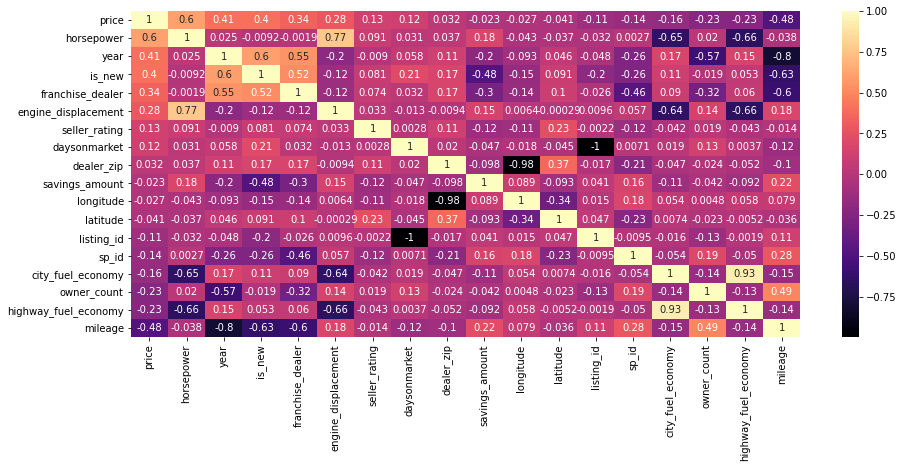

In [7]:
k = 66
cols = data.corr().nlargest(k,'price')['price'].index
cm = data[cols].corr()
plt.figure(figsize=(15,6))
sns.heatmap(cm,cmap='magma',annot=True)

In [8]:
!pip3 install mglearn
import mglearn
cv1=LeaveOneOut()
l1=[20,40,50,60,80,90]
test1=[]
train1=[]
rms1=[]
mae1=[]
eq=[]
for i in l1:
    X,y=mglearn.datasets.make_wave(n_samples=i)
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
    lr=LinearRegression().fit(X_train,y_train)
    a=f"y={lr.coef_}x+{lr.intercept_}"
    eq.append(a)
    #print(f"Training set score: {lr.score(X_train,y_train):.2f}")
    #print(f"Test set score: {lr.score(X_test,y_test):.2f}")
    test1.append(round(lr.score(X_test,y_test),2))
    train1.append(round(lr.score(X_train,y_train),2))
    predicted = lr.predict(X_test)
    expected = y_test
    rms1.append(np.sqrt(np.mean((predicted - expected) ** 2)))
    scores1 = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=cv1, n_jobs=-1)
    scores1 = absolute(scores1)
    #print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
    mae1.append(round(mean(scores1)*std(scores1),3))
data1=pd.DataFrame({"Samples":l1,"Equation":eq,"Train Score":train1,"Test Score":test1,"RMS":rms1,"MAE":mae1})
data1

     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=aef8eb829e1d2d22c734b6f36b1938d78634671cc4010ad376ccce4c1927c989
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


,Samples,Equation,Train Score,Test Score,RMS,MAE
0,20,y=[0.44688903]x+-0.21891682902642987,0.82,0.76,0.335708,0.081
1,40,y=[0.47954524]x+-0.09847983994403892,0.65,0.77,0.397486,0.171
2,50,y=[0.40640007]x+-0.014705169783905944,0.60,0.57,0.751516,0.214
3,60,y=[0.39390555]x+-0.031804343026759746,0.67,0.66,0.628257,0.144
4,80,y=[0.44837355]x+-0.050756620128862145,0.65,0.72,0.681570,0.187
5,90,y=[0.48612866]x+0.020961658809768025,0.69,0.73,0.542701,0.165


#  We can see that highest test score is 0.77 at n_samples=40 but train score=0.65, this difference shows that model is **overfit.**
# Where as the test score 0.66 at n_samples=60, train score is 0.67 which are closely related values which that model is **underfit**.

In [9]:
X,y=mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
lr=LinearRegression().fit(X_train,y_train)
print(f"Co-effecient:{lr.coef_}\n Intercept:{lr.intercept_}\n y={lr.coef_}x+{lr.intercept_}")
print(f"Training set score: {lr.score(X_train,y_train):.2f}")
print(f"Test set score: {lr.score(X_test,y_test):.2f}")

Co-effecient:[-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871915e+01 -1.75331865e+01  4.10103194e+00
  2.93666477

In [10]:
cv=LeaveOneOut()


In [11]:
l2=[20,40,50,60,80,90]
test2=[]
train2=[]
rms=[]
mae=[]
for i in l2:
    X,y=mglearn.datasets.make_wave(n_samples=i)
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
    reg=KNeighborsRegressor(n_neighbors=3)
    reg.fit(X_train,y_train)
    #print(f"Test set predicitons:{reg.predict(X_test)}\n" )
    predicted = reg.predict(X_test)
    expected = y_test
    rms.append(np.sqrt(np.mean((predicted - expected) ** 2)))
    #print(f"Test set R^2:{reg.score(X_test,y_test):.2f}")
    test2.append(round(reg.score(X_test,y_test),2))
    train2.append(round(reg.score(X_train,y_train),2))
    scores = cross_val_score(reg, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    scores = absolute(scores)
    #print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
    mae.append(round(mean(scores)*std(scores),3))
    
test_pd=pd.DataFrame({"Sample":l2,"Train Score":train2,"Test score":test2,"RMS":rms,"MAE":mae})
test_pd

,Sample,Train Score,Test score,RMS,MAE
0,20,0.84,0.49,0.489031,0.115
1,40,0.89,0.24,0.726238,0.146
2,50,0.83,0.66,0.667310,0.156
3,60,0.81,0.75,0.540261,0.122
4,80,0.84,0.80,0.571231,0.168
5,90,0.82,0.78,0.490372,0.155


# The test score is **0.80** and train score is 0.84, so model fits relatively good at n_samples=80.The model is evaluated using LOOCV and the performance of the model when making predictions on new data is a mean absolute error of about 0.168

In [12]:
#Step4: Loading the data in the axis data frames:
X1 = DataFrame(data, columns=['year'])
y1 = DataFrame(data, columns=['price'])
X2 = DataFrame(data, columns=['mileage'])
y2 = DataFrame(data, columns=['price'])
X3 = DataFrame(data, columns=['owner_count'])
y3 = DataFrame(data, columns=['price'])
X4 = DataFrame(data, columns=['highway_fuel_economy'])
y4 = DataFrame(data, columns=['price'])
X5 = DataFrame(data, columns=['city_fuel_economy'])
y5 = DataFrame(data, columns=['price'])
X6 = DataFrame(data, columns=['latitude'])
y6 = DataFrame(data, columns=['price'])


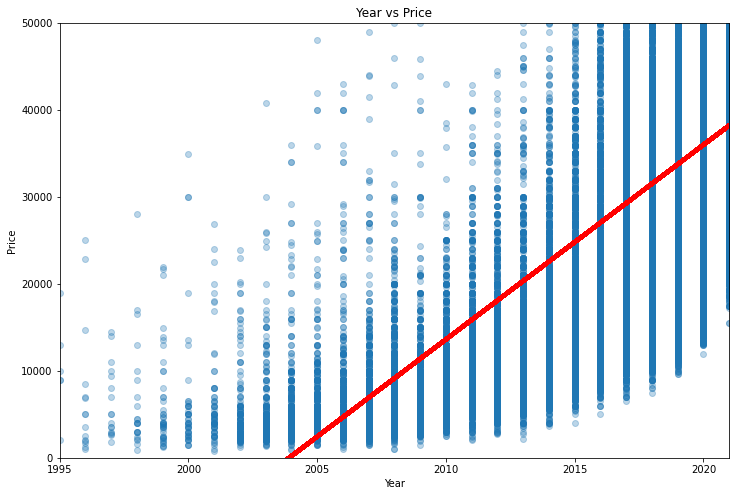

Regression coeficent: 2236.78
Mean squared error: 1248623530.05
Coefficient of determination: -86266010.69


In [13]:
#Step6: Updating the previous code to draw the LinearRegression
plt.figure(figsize=(12,8))
plt.scatter(X1, y1, alpha = 0.3)
#Draws the Linear Regression
regression = linear_model.LinearRegression()
regression.fit(X1, y1)
plt.plot(X1, regression.predict(X1), color='red', linewidth=4)
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.ylim(0, 50000)
plt.xlim(1995, 2021)
plt.show()

#Step7:Calculating the Regression Theta Coefficient:
print('Regression coeficent: %.2f' % regression.coef_ )#theta_1
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(X1, y1))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(X1, y1))

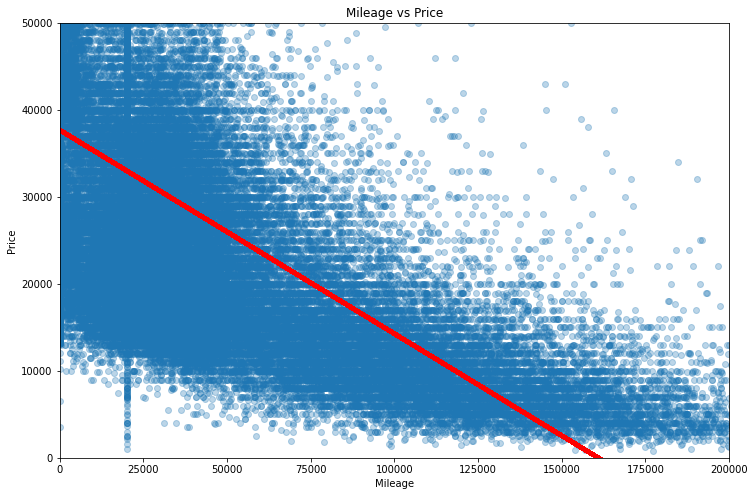

Regression coeficent: -0.23
Mean squared error: 3042809158.44
Coefficient of determination: -0.72


In [14]:
#Filling the NAN Values with average values for the column
X2 = DataFrame(data, columns=['mileage']).fillna(value=20000)
#Step6: Updating the previous code to draw the LinearRegression
plt.figure(figsize=(12,8))
plt.scatter(X2, y2, alpha = 0.3)
#Draws the Linear Regression
regression = linear_model.LinearRegression()
regression.fit(X2, y2)
plt.plot(X2, regression.predict(X2), color='red', linewidth=4)
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.ylim(0, 50000)
plt.xlim(0, 200000)
plt.show()

#Step7:Calculating the Regression Theta Coefficient:
print('Regression coeficent: %.2f' % regression.coef_ )#theta_1
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(X2, y2))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(X2, y2))

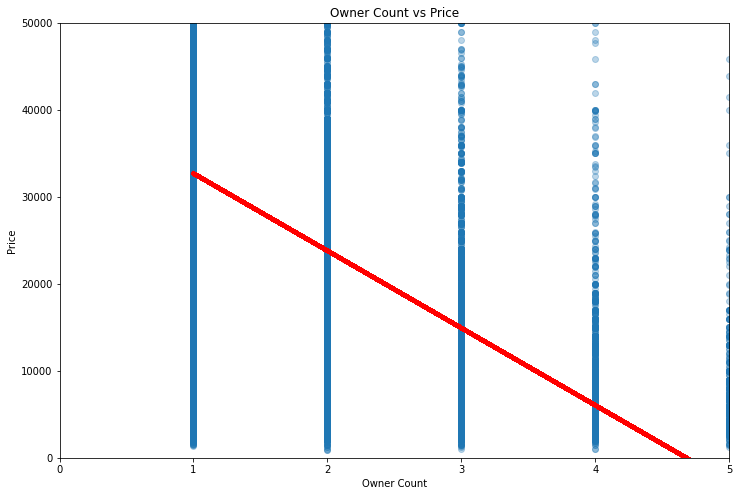

Regression coeficent: -8883.35
Mean squared error: 1367617624.88
Coefficient of determination: -3314845956.60


In [15]:
#Filling the NAN Values with average values for the column
X3 = DataFrame(data, columns=['owner_count']).fillna(value=1)
#Step6: Updating the previous code to draw the LinearRegression
plt.figure(figsize=(12,8))
plt.scatter(X3, y3, alpha = 0.3)
#Draws the Linear Regression
regression = linear_model.LinearRegression()
regression.fit(X3, y3)
plt.plot(X3, regression.predict(X3), color='red', linewidth=4)
plt.title('Owner Count vs Price')
plt.xlabel('Owner Count')
plt.ylabel('Price')
plt.ylim(0, 50000)
plt.xlim(0, 5)
plt.show()

#Step7:Calculating the Regression Theta Coefficient:
print('Regression coeficent: %.2f' % regression.coef_ )#theta_1
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(X3, y3))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(X3, y3))


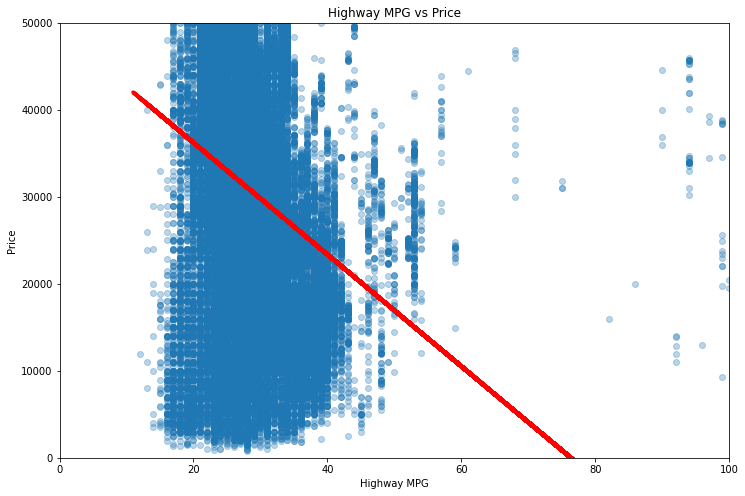

Regression coeficent: -642.82
Mean squared error: 1365977317.29
Coefficient of determination: -32518827.26


In [16]:
#Filling the NAN Values with average values for the column
X4 = DataFrame(data, columns=['highway_fuel_economy']).fillna(value=28)
#Step6: Updating the previous code to draw the LinearRegression
plt.figure(figsize=(12,8))
plt.scatter(X4, y4, alpha = 0.3)
#Draws the Linear Regression
regression = linear_model.LinearRegression()
regression.fit(X4, y4)
plt.plot(X4, regression.predict(X4), color='red', linewidth=4)
plt.title('Highway MPG vs Price')
plt.xlabel('Highway MPG')
plt.ylabel('Price')
plt.ylim(0, 50000)
plt.xlim(0, 100)
plt.show()

#Step7:Calculating the Regression Theta Coefficient:
print('Regression coeficent: %.2f' % regression.coef_ )#theta_1
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(X4, y4))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(X4, y4))

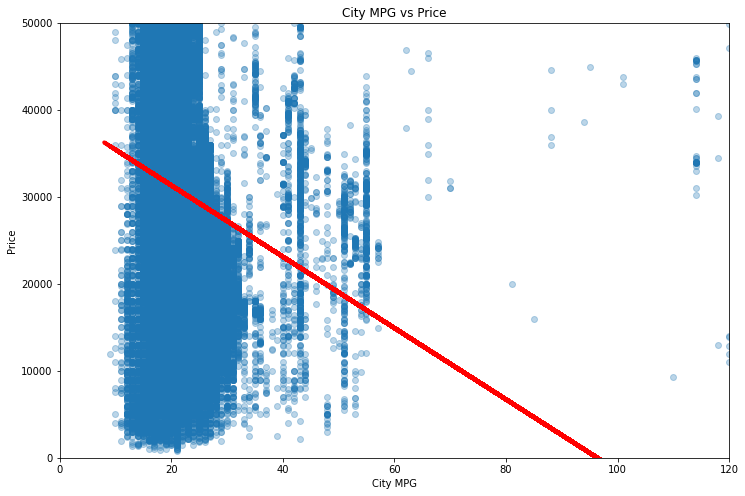

Regression coeficent: -410.29
Mean squared error: 1366384718.99
Coefficient of determination: -26580454.20


In [17]:
#Filling the NAN Values with average values for the column
X5 = DataFrame(data, columns=['city_fuel_economy']).fillna(value=21)
#Step6: Updating the previous code to draw the LinearRegression
plt.figure(figsize=(12,8))
plt.scatter(X5, y5, alpha = 0.3)
#Draws the Linear Regression
regression = linear_model.LinearRegression()
regression.fit(X5, y5)
plt.plot(X5, regression.predict(X5), color='red', linewidth=4)
plt.title('City MPG vs Price')
plt.xlabel('City MPG')
plt.ylabel('Price')
plt.ylim(0, 50000)
plt.xlim(0, 120)
plt.show()

#Step7:Calculating the Regression Theta Coefficient:
print('Regression coeficent: %.2f' % regression.coef_ )#theta_1
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(X5, y5))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(X5, y5))


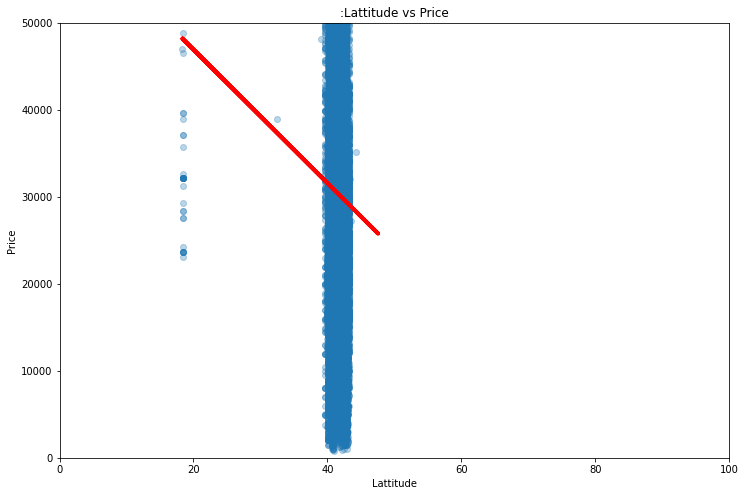

Regression coeficent: -767.58
Mean squared error: 1365163456.34
Coefficient of determination: -1114638786.94


In [18]:
#Filling the NAN Values with average values for the column

#Step6: Updating the previous code to draw the LinearRegression
plt.figure(figsize=(12,8))
plt.scatter(X6, y6, alpha = 0.3)
#Draws the Linear Regression
regression = linear_model.LinearRegression()
regression.fit(X6, y6)
plt.plot(X6, regression.predict(X6), color='red', linewidth=4)
plt.title(':Lattitude vs Price')
plt.xlabel('Lattitude')
plt.ylabel('Price')
plt.ylim(0, 50000)
plt.xlim(0, 100)
plt.show()

#Step7:Calculating the Regression Theta Coefficient:
print('Regression coeficent: %.2f' % regression.coef_ )#theta_1
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(X6, y6))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(X6, y6))

In [19]:
#controls the numer of rows to be read in the dataframe
start, end = 0, 20000
fig = go.Figure(data=go.Scatter3d(
    x=data['year'][start:end],
    y=data['mileage'][start:end],
    z=data['owner_count'][start:end],
    text=data['model_name'][start:end],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        sizeref=12000,
        size=data['price'][start:end],
        color = data['highway_fuel_economy'][start:end],
        colorscale = 'Viridis',
        colorbar_title = 'highway_fuel_economy<br>',
        line_color='rgb(140, 140, 170)'
    )
))








fig.update_layout(height=600, width=600,
                  title='3-D Graph - X-Year,Y-Mileage,Z-Owner Count,Size-Price,Color-Highway MPG')